# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

> **IMPORTANT**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings with your own analysis.

## Overview

This notebook provides an exploration of [Dandiset 001195, version 0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733), which contains data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Lee, Matthews, and colleagues.

This Dandiset includes both intracellular electrophysiology recordings and calcium imaging data with corresponding behavioral videos. The research focuses on dopamine neurons in the dorsal raphe nucleus (DRN) and their projections to different brain regions including the central amygdala (CeA), bed nucleus of the stria terminalis (BNST), and posterior basolateral amygdala (BLP) in the context of social isolation and loneliness-like states in mice.

In this notebook, we will:
1. Load data from the Dandiset using the DANDI API
2. Explore electrophysiology recordings to understand neuronal responses
3. Examine calcium imaging data to visualize neural activity patterns
4. Demonstrate how to access behavioral videos linked to the calcium imaging

## Required Packages

The following packages are needed to run this notebook:
- pynwb: For working with Neurodata Without Borders (NWB) files
- dandi: For accessing data from the DANDI archive
- remfile: For remote file access
- h5py: For working with HDF5 files
- numpy: For numerical operations
- matplotlib: For data visualization
- seaborn: For enhanced visualizations
- pandas: For data manipulation
- scipy: For signal processing and statistical functions

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns
import scipy.signal as signal
from scipy import stats
import warnings

# Set seaborn style for better visualizations
sns.set_theme()

# Configure warnings to prevent cluttering output
warnings.filterwarnings('ignore', category=UserWarning, module='pynwb')

## Loading the Dandiset

First, we'll use the DANDI API to access the Dandiset and see its basic information. Note that accessing large files over the network may sometimes cause timeout errors, especially with slower internet connections. We'll implement error handling to address this potential issue.

In [2]:
# Connect to DANDI archive with error handling
try:
    client = DandiAPIClient()
    dandiset = client.get_dandiset("001195", "0.250408.1733")

    # Print basic information about the Dandiset
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata['name']}")
    print(f"Dandiset URL: {metadata['url']}")
    print(f"Dandiset version: {metadata['version']}")
    print(f"Dandiset citation: {metadata['citation']}")
    
    # Print keywords and measurement techniques which help understand the data types
    print(f"\nKeywords: {', '.join(metadata['keywords'])}")
    
    if 'measurementTechnique' in metadata:
        print("\nMeasurement techniques:")
        for technique in metadata['measurementTechnique']:
            if 'name' in technique:
                print(f"- {technique['name']}")
    
    print(f"\nDescription snippet: {metadata['description'][:500]}...")  # Truncated for readability
except Exception as e:
    print(f"Error connecting to DANDI API: {e}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Dandiset version: 0.250408.1733
Dandiset citation: Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A. ; Tye, Kay M.  (2025) Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State (Version 0.250408.1733) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001195/0.250408.1733

Keywords: optogenetics, behavior videos, calcium imaging, electrophysiology, Social Isolation, Social Motivation, mouse behavior, behavioral neuroscience, mouse model, Dorsal Raphe Nucleus (DRN), Dopamine neurons

Description snippet: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, La

Now we'll list some assets in this Dandiset to get an idea of what types of data are available:

In [3]:
# List some assets in the Dandiset with error handling
try:
    assets = dandiset.get_assets()
    print("\nSample of assets in the Dandiset:")
    
    # Group assets by type to provide better overview
    asset_list = list(islice(assets, 30))  # Get first 30 assets
    
    # Identify different data types
    ephys_files = [a for a in asset_list if "icephys.nwb" in a.path]
    ophys_files = [a for a in asset_list if "ophys.nwb" in a.path]
    video_files = [a for a in asset_list if ".mp4" in a.path]
    other_files = [a for a in asset_list if not any(x in a.path for x in ["icephys.nwb", "ophys.nwb", ".mp4"])]
    
    print(f"\nElectrophysiology files (sample of {len(ephys_files)}):")
    for asset in ephys_files[:5]:
        print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size/1e6:.1f} MB)")
        
    print(f"\nCalcium imaging files (sample of {len(ophys_files)}):")
    for asset in ophys_files[:5]:
        print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size/1e6:.1f} MB)")
        
    print(f"\nBehavioral video files (sample of {len(video_files)}):")
    for asset in video_files[:5]:
        print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size/1e6:.1f} MB)")
        
except Exception as e:
    print(f"Error retrieving assets: {e}")


Sample of assets in the Dandiset:

Electrophysiology files (sample of 30):
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7, Size: 37.7 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc, Size: 39.7 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c, Size: 13.6 MB)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783, Size: 42.3 MB)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19, Size: 84.2 MB)

Calcium imaging files (sample of 0):

Behavioral video files (sample of 0):


## Exploring Electrophysiology Data

Let's first explore an intracellular electrophysiology recording from this Dandiset. We'll load a file that contains patch-clamp recordings from a neuron in the central amygdala (CeA). For large files, we'll implement a strategy to avoid loading the entire dataset at once by accessing specific portions as needed.

In [4]:
# Load an electrophysiology NWB file with error handling
ephys_url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
ephys_nwb = None
h5_file = None

try:
    # Open the remote file
    remote_file = remfile.File(ephys_url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    ephys_nwb = io.read()
    
    # Print detailed information about the file
    print("Electrophysiology recording information:")
    print(f"Session description: {ephys_nwb.session_description}")
    print(f"Lab: {ephys_nwb.lab}")
    print(f"Institution: {ephys_nwb.institution}")
    print(f"File creation date: {ephys_nwb.file_create_date[0]}")
    
    # Metadata about the cell and recording
    print("\nRecording metadata:")
    print(f"Cell ID: {ephys_nwb.lab_meta_data['DandiIcephysMetadata'].cell_id}")
    print(f"Slice ID: {ephys_nwb.lab_meta_data['DandiIcephysMetadata'].slice_id}")
    print(f"Targeted brain region: {ephys_nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")
    print(f"Inferred brain region: {ephys_nwb.lab_meta_data['DandiIcephysMetadata'].inferred_layer}")
    
    # Subject information
    print("\nSubject information:")
    print(f"Subject ID: {ephys_nwb.subject.subject_id}")
    print(f"Species: {ephys_nwb.subject.species}")
    print(f"Age: {ephys_nwb.subject.age}")
    print(f"Sex: {ephys_nwb.subject.sex}")
    print(f"Genotype: {ephys_nwb.subject.genotype}")
    print(f"Strain: {ephys_nwb.subject.strain}")
    print(f"Description: {ephys_nwb.subject.description}")
    
    # Count acquisition and stimulus series
    acquisition_series = [k for k in ephys_nwb.acquisition.keys()]
    stimulus_series = [k for k in ephys_nwb.stimulus.keys()]
    print(f"\nNumber of acquisition series: {len(acquisition_series)}")
    print(f"Number of stimulus series: {len(stimulus_series)}")
    
except Exception as e:
    print(f"Error loading electrophysiology file: {e}")
    ephys_nwb = None

Electrophysiology recording information:
Session description: episodic stimulation
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology
File creation date: 2025-04-03 16:56:47.408514-07:00

Recording metadata:
Cell ID: C1
Slice ID: slice 1
Targeted brain region: CeA
Inferred brain region: CeA

Subject information:
Subject ID: 23
Species: Mus musculus
Age: P302D
Sex: F
Genotype: heterozygote
Strain: DAT::Cre
Description: AAV5-DIO-ChR2-eYFP into DRN

Number of acquisition series: 87
Number of stimulus series: 86


The file contains current clamp recordings showing the neuron's response to current injections. Let's examine one of these responses:

In [5]:
# Extract the electrophysiology data if available
if ephys_nwb is not None:
    try:
        # Get a list of all the current clamp response data
        current_clamp_responses = [ephys_nwb.acquisition[key] for key in ephys_nwb.acquisition.keys() 
                                if 'current_clamp-response' in key and 'ch-0' in key]

        # Get a list of all the stimulus data
        stimuli = [ephys_nwb.stimulus[key] for key in ephys_nwb.stimulus.keys() 
                if 'stimulus' in key and 'ch-0' in key]

        print("\nElectrophysiology recording details:")
        print(f"Number of current clamp recordings: {len(current_clamp_responses)}")
        if len(current_clamp_responses) > 0:
            print(f"Sampling rate: {current_clamp_responses[0].rate} Hz")
            print(f"Description: {current_clamp_responses[0].description}")
            print(f"Unit: {current_clamp_responses[0].unit}")
            print(f"Number of samples per recording: {current_clamp_responses[0].data.shape[0]}")
            print(f"Duration of each recording: {current_clamp_responses[0].data.shape[0]/current_clamp_responses[0].rate:.3f} seconds")
        
        # Find the range of stimulus amplitudes
        if len(stimuli) > 0:
            stim_amplitudes = []
            for i, stim in enumerate(stimuli[:20]):  # Look at first 20 stimuli
                # Extract middle portion of stimulus to get plateau value
                mid_idx = stim.data.shape[0] // 2
                stim_value = np.mean(stim.data[mid_idx-500:mid_idx+500]) * stim.conversion
                stim_amplitudes.append(stim_value)
            
            print(f"\nStimulus amplitude range: {min(stim_amplitudes):.2e} to {max(stim_amplitudes):.2e} {stimuli[0].unit}")
            
    except Exception as e:
        print(f"Error extracting electrophysiology data: {e}")


Electrophysiology recording details:
Number of current clamp recordings: 23
Sampling rate: 10000.0 Hz
Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Unit: volts
Number of samples per recording: 3000
Duration of each recording: 0.300 seconds

Stimulus amplitude range: -1.14e-10 to 2.48e-10 amperes


Now let's visualize some of the current clamp responses to see how the neuron responds to different current injections:

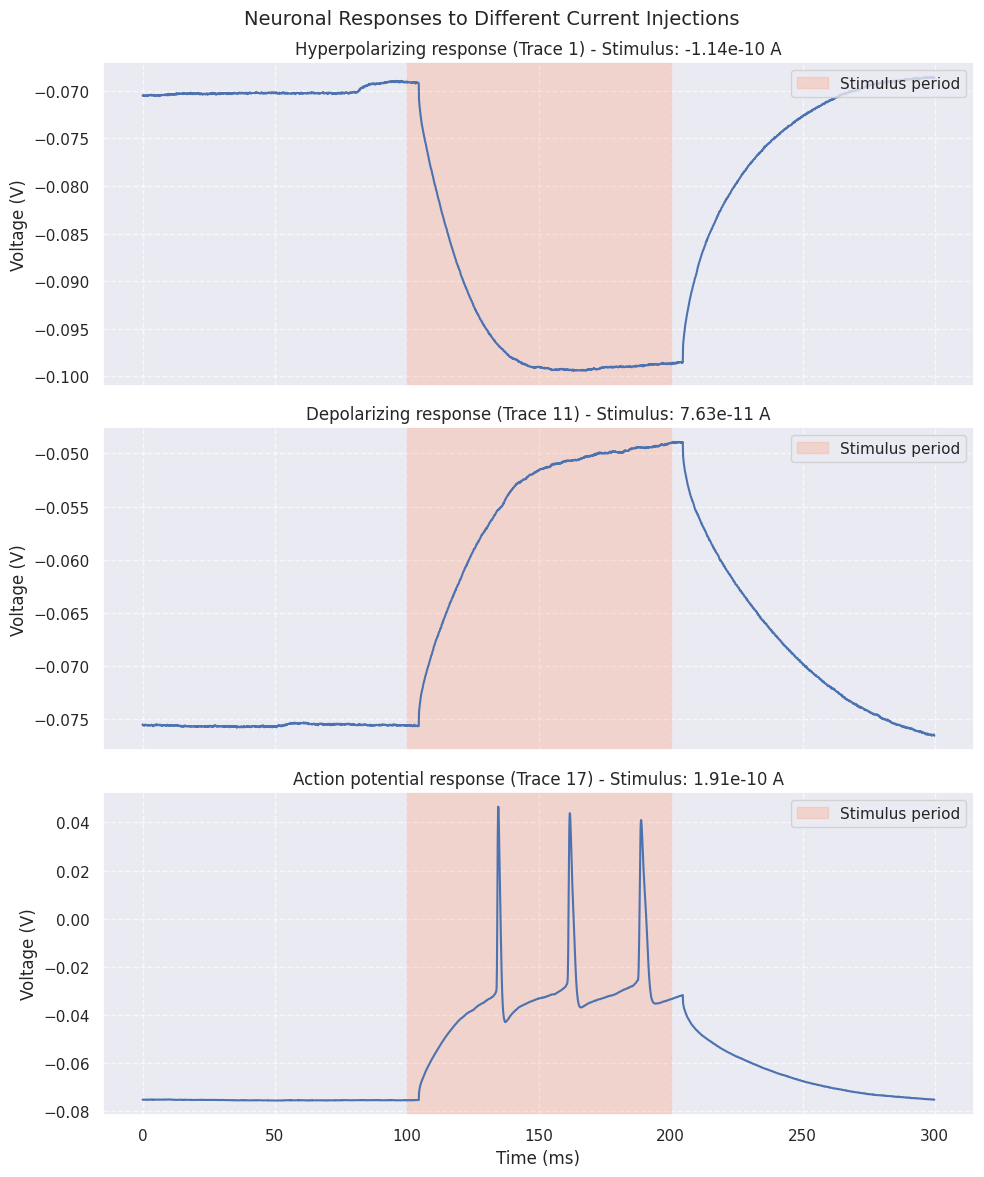

In [6]:
# Plot several current clamp responses showing different patterns
if ephys_nwb is not None and 'current_clamp_responses' in locals() and len(current_clamp_responses) > 0:
    try:
        fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

        # Time vector (in ms)
        time = np.arange(0, current_clamp_responses[0].data.shape[0]) / current_clamp_responses[0].rate * 1000

        # Select 3 responses showing different patterns
        response_indices = [0, 10, 16]  # Hyperpolarizing, depolarizing, action potential
        response_types = ["Hyperpolarizing response", "Depolarizing response", "Action potential response"]

        for i, (idx, resp_type) in enumerate(zip(response_indices, response_types)):
            if idx < len(current_clamp_responses):
                # Get stimulus for context
                if idx < len(stimuli):
                    stim_data = stimuli[idx].data[:] * stimuli[idx].conversion
                    stim_value = np.mean(stim_data[1000:2000])  # Get steady-state value
                    stim_label = f"Stimulus: {stim_value:.2e} A"
                else:
                    stim_label = "Stimulus unknown"
                
                # Plot response
                data = current_clamp_responses[idx].data[:] * current_clamp_responses[idx].conversion
                axs[i].plot(time, data, 'b')
                axs[i].set_ylabel('Voltage (V)')
                axs[i].set_title(f'{resp_type} (Trace {idx+1}) - {stim_label}')
                axs[i].grid(True, linestyle='--', alpha=0.7)
                
                # Add stimulus period indication
                axs[i].axvspan(100, 200, color='lightsalmon', alpha=0.3, label='Stimulus period')
                
                # Add legend
                axs[i].legend(loc='upper right')

        axs[-1].set_xlabel('Time (ms)')
        plt.suptitle('Neuronal Responses to Different Current Injections', fontsize=14)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting current clamp responses: {e}")

Let's also look at a stimulus-response pair to better understand the relationship between current injection and voltage response:

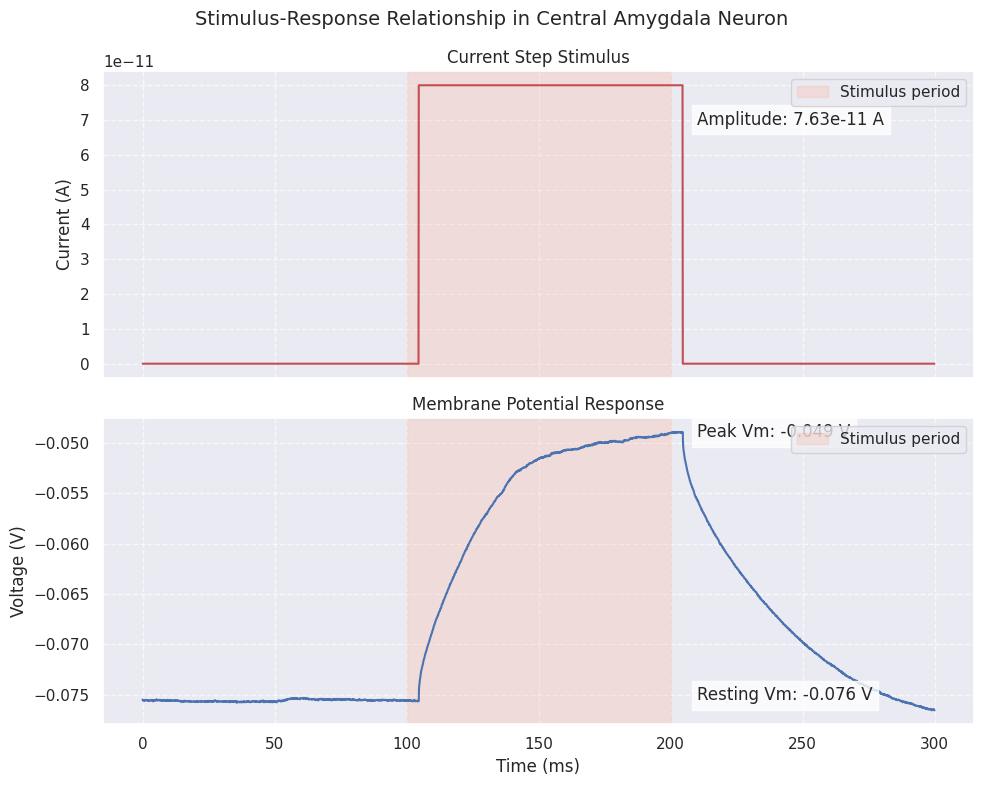

In [7]:
# Plot stimulus and response together for a specific recording with improved annotations
if ephys_nwb is not None and 'current_clamp_responses' in locals() and 'stimuli' in locals():
    try:
        fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

        # Choose a specific recording that shows clear depolarization
        idx = 10  

        if idx < len(current_clamp_responses) and idx < len(stimuli):
            # Time vector (in ms)
            time = np.arange(0, current_clamp_responses[idx].data.shape[0]) / current_clamp_responses[idx].rate * 1000
            
            # Plot the stimulus with annotations
            stimulus_data = stimuli[idx].data[:] * stimuli[idx].conversion
            axs[0].plot(time, stimulus_data, 'r')
            axs[0].set_ylabel('Current (A)')
            axs[0].set_title(f'Current Step Stimulus')
            axs[0].grid(True, linestyle='--', alpha=0.7)
            
            # Calculate and display stimulus amplitude
            stim_amplitude = np.mean(stimulus_data[1000:2000])
            axs[0].text(210, stim_amplitude*0.9, 
                        f"Amplitude: {stim_amplitude:.2e} A", 
                        bbox=dict(facecolor='white', alpha=0.8))
            
            # Plot the response with annotations
            response_data = current_clamp_responses[idx].data[:] * current_clamp_responses[idx].conversion
            axs[1].plot(time, response_data, 'b')
            axs[1].set_ylabel('Voltage (V)')
            axs[1].set_title(f'Membrane Potential Response')
            axs[1].grid(True, linestyle='--', alpha=0.7)
            
            # Calculate and display key metrics
            resting_v = np.mean(response_data[:100])  # Pre-stimulus
            peak_v = np.mean(response_data[1800:2000])  # End of stimulus
            axs[1].text(210, resting_v, f"Resting Vm: {resting_v:.3f} V", 
                        bbox=dict(facecolor='white', alpha=0.8))
            axs[1].text(210, peak_v, f"Peak Vm: {peak_v:.3f} V", 
                        bbox=dict(facecolor='white', alpha=0.8))
            
            # Highlight stimulus period
            for ax in axs:
                ax.axvspan(100, 200, color='lightsalmon', alpha=0.2, label='Stimulus period')
                ax.legend(loc='upper right')

        axs[-1].set_xlabel('Time (ms)')
        plt.suptitle('Stimulus-Response Relationship in Central Amygdala Neuron', fontsize=14)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting stimulus-response pair: {e}")

One way to characterize a neuron is by its current-voltage (I-V) relationship, which can tell us about its excitability properties. Let's plot the I-V curve:

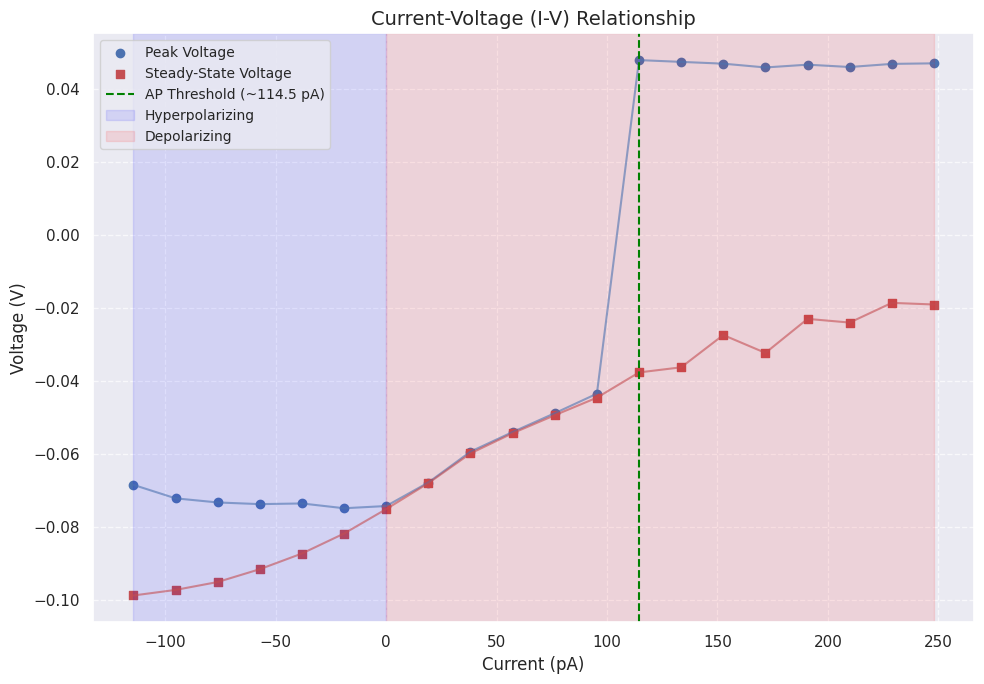


I-V Relationship Analysis:
Approximate action potential threshold: 114.5 pA
Approximate input resistance: 281.29 MΩ

Electrophysiology file closed successfully.


In [8]:
# Plot current-voltage relationship (I-V curve) with improved scaling and annotations
if ephys_nwb is not None and 'current_clamp_responses' in locals() and 'stimuli' in locals():
    try:
        fig, ax = plt.subplots(figsize=(10, 7))

        # Get stimulus amplitudes and peak responses
        num_responses = min(20, len(current_clamp_responses))  # Limit to first 20 recordings
        stimulus_amplitudes = []
        peak_responses = []
        steady_responses = []  # For steady-state voltage responses

        for i in range(num_responses):
            if i < len(stimuli):
                # Get stimulus amplitude (use the mean current value during the stimulus)
                stimulus_data = stimuli[i].data[1000:2000] * stimuli[i].conversion
                stimulus_amplitude = np.mean(stimulus_data)
                stimulus_amplitudes.append(stimulus_amplitude)
                
                # Get peak and steady-state responses
                response_data = current_clamp_responses[i].data[:] * current_clamp_responses[i].conversion
                peak_response = np.max(response_data)
                steady_response = np.mean(response_data[1800:2000])  # Near end of stimulus
                peak_responses.append(peak_response)
                steady_responses.append(steady_response)

        # Sort by stimulus amplitude
        sorted_indices = np.argsort(stimulus_amplitudes)
        sorted_stimulus_amplitudes = np.array(stimulus_amplitudes)[sorted_indices]
        sorted_peak_responses = np.array(peak_responses)[sorted_indices]
        sorted_steady_responses = np.array(steady_responses)[sorted_indices]
        
        # Convert to more readable units (picoamps for current)
        pA_stimulus = sorted_stimulus_amplitudes * 1e12  # Convert to pA
        
        # Determine threshold for action potential
        # Find the largest jump in peak voltage
        voltage_diffs = np.diff(sorted_peak_responses)
        if len(voltage_diffs) > 0:
            threshold_idx = np.argmax(voltage_diffs) + 1
            threshold_current = pA_stimulus[threshold_idx]
        else:
            threshold_current = None

        # Plot I-V curves
        ax.scatter(pA_stimulus, sorted_peak_responses, c='b', marker='o', label='Peak Voltage')
        ax.plot(pA_stimulus, sorted_peak_responses, 'b-', alpha=0.6)
        
        ax.scatter(pA_stimulus, sorted_steady_responses, c='r', marker='s', label='Steady-State Voltage')
        ax.plot(pA_stimulus, sorted_steady_responses, 'r-', alpha=0.6)
        
        # Mark threshold if found
        if threshold_current is not None:
            ax.axvline(x=threshold_current, color='green', linestyle='--', 
                       label=f'AP Threshold (~{threshold_current:.1f} pA)')

        # Better labels and formatting
        ax.set_xlabel('Current (pA)', fontsize=12)
        ax.set_ylabel('Voltage (V)', fontsize=12)
        ax.set_title('Current-Voltage (I-V) Relationship', fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Add regions of interest and interpretation
        if min(pA_stimulus) < 0 and max(pA_stimulus) > 0:
            # Hyperpolarizing region
            ax.axvspan(min(pA_stimulus), 0, color='blue', alpha=0.1, label='Hyperpolarizing')
            # Depolarizing region
            ax.axvspan(0, max(pA_stimulus), color='red', alpha=0.1, label='Depolarizing')
        
        ax.legend(fontsize=10)
        plt.tight_layout()
        plt.show()
        
        # Print some interpretations
        print("\nI-V Relationship Analysis:")
        if threshold_current is not None:
            print(f"Approximate action potential threshold: {threshold_current:.1f} pA")
        
        # Calculate input resistance in the linear region
        try:
            # Find region before action potentials (if any)
            linear_region = np.where(sorted_peak_responses < -0.04)[0]  # Typically linear below -40mV
            if len(linear_region) > 1:
                x = sorted_stimulus_amplitudes[linear_region]
                y = sorted_steady_responses[linear_region]
                slope, _, _, _, _ = stats.linregress(x, y)
                input_resistance = slope  # V/A = Ohms
                print(f"Approximate input resistance: {input_resistance/1e6:.2f} MΩ")
        except:
            pass
        
    except Exception as e:
        print(f"Error plotting I-V relationship: {e}")

# Close the electrophysiology file if it's open
if h5_file is not None:
    try:
        h5_file.close()
        print("\nElectrophysiology file closed successfully.")
    except:
        pass

## Exploring Calcium Imaging Data

Now let's explore a calcium imaging recording from this Dandiset. We'll load an NWB file containing one-photon calcium imaging data from the central amygdala (CeA). Calcium imaging data can be quite large, so we'll implement strategies to work with manageable portions of the data.

In [9]:
# Load a calcium imaging NWB file with error handling
ca_url = "https://api.dandiarchive.org/api/assets/7ac3357c-06e4-4f04-a869-2f3a71524456/download/"
ca_nwb = None
ca_h5_file = None

try:
    # Open the remote file
    remote_file = remfile.File(ca_url)
    ca_h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=ca_h5_file)
    ca_nwb = io.read()
    
    # Print detailed information about the file
    print("Calcium imaging recording information:")
    print(f"Session description: {ca_nwb.session_description}")
    print(f"Lab: {ca_nwb.lab}")
    print(f"Institution: {ca_nwb.institution}")
    print(f"File creation date: {ca_nwb.file_create_date[0]}")
    
    # Print experimental details
    print("\nExperimental protocol:")
    print(f"Experiment description: {ca_nwb.experiment_description}")
    print(f"Stimulus notes: {ca_nwb.stimulus_notes}")
    if hasattr(ca_nwb, 'virus'):
        print(f"Viral constructs: {ca_nwb.virus}")
    
    # Subject information
    print("\nSubject information:")
    print(f"Subject ID: {ca_nwb.subject.subject_id}")
    print(f"Species: {ca_nwb.subject.species}")
    print(f"Age: {ca_nwb.subject.age}")
    print(f"Sex: {ca_nwb.subject.sex}")
    print(f"Description: {ca_nwb.subject.description}")
    
    # Optical physiology metadata
    if 'ophys' in ca_nwb.processing:
        ophys = ca_nwb.processing['ophys']
        print("\nOptical physiology metadata:")
        
        if 'Fluorescence' in ophys.data_interfaces:
            fluorescence = ophys.data_interfaces['Fluorescence']
            roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']
            print(f"Indicator: {ca_nwb.imaging_planes['ImagingPlane'].indicator}")
            print(f"Imaging location: {ca_nwb.imaging_planes['ImagingPlane'].location}")
            print(f"Excitation wavelength: {ca_nwb.imaging_planes['ImagingPlane'].excitation_lambda} nm")
            print(f"Device: {ca_nwb.imaging_planes['ImagingPlane'].device.description}")
            print(f"Manufacturer: {ca_nwb.imaging_planes['ImagingPlane'].device.manufacturer}")
    
except Exception as e:
    print(f"Error loading calcium imaging file: {e}")
    ca_nwb = None

Calcium imaging recording information:
Session description: Group housed, Day 2, Stim OFF, 3/2/2023
Lab: Kay Tye Lab
Institution: Salk Institute of Biological Sciences
File creation date: 2024-09-25 13:12:12.528479-07:00

Experimental protocol:
Experiment description: 5min habituation - 5min stimulation with juvenile (couterbalanced across two days) - 5min no stimulation with juvenile
Stimulus notes: 5min at 20Hz, 5ms 10mW/mm2 - 589nm
Viral constructs: retroAAV-hSyn-Cre-P2A-tdTomato, AAV1-hysn-GCAMP7f, and 0.5x4mm GRIN in mPFC and AAV8-hSyn-FLEX-Chrimson-tdTomato in BLA

Subject information:
Subject ID: C370
Species: Mus musculus
Age: P145D
Sex: M
Description: DRNDAT_chrimson, intermediate rank

Optical physiology metadata:
Indicator: GCamp7f
Imaging location: central amygdala (CeA)
Excitation wavelength: 480.0 nm
Device: NVoke2
Manufacturer: Inscopix


Let's look at the structure of the optical physiology data in this NWB file:

In [10]:
# Extract the calcium imaging data using chunked access
if ca_nwb is not None and 'ophys' in ca_nwb.processing:
    try:
        ophys = ca_nwb.processing['ophys']
        
        # Get the fluorescence data
        fluorescence = ophys.data_interfaces['Fluorescence']
        roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']
        
        # Get information about the data dimensions without loading all the data
        roi_data_shape = roi_response_series.data.shape
        sampling_rate = roi_response_series.rate
        
        # Get information about the regions of interest (ROIs)
        plane_segmentation = ophys.data_interfaces['PlaneSegmentation']
        num_rois = len(plane_segmentation.id.data[:])
        
        print("\nCalcium imaging data information:")
        print(f"Number of ROIs: {roi_data_shape[1]}")
        print(f"Number of time points: {roi_data_shape[0]}")
        print(f"Sampling rate: {sampling_rate} Hz")
        print(f"Recording duration: {roi_data_shape[0]/sampling_rate:.2f} seconds")
        print(f"Data unit: {roi_response_series.unit}")
        
        # Get the imaging field dimensions
        one_photon_series = ca_nwb.acquisition['OnePhotonSeries']
        print(f"Imaging field dimensions: {one_photon_series.dimension[0]} x {one_photon_series.dimension[1]} pixels")
        
        # Extract metadata about the experimental protocol
        # Parse the experiment description to identify distinct phases
        exp_desc = ca_nwb.experiment_description
        phases = []
        if "5min habituation" in exp_desc:
            phases.append(("Habituation", 0, 300))  # 0-300 seconds
        
        if "5min stimulation with juvenile" in exp_desc:
            phases.append(("Juvenile Stimulation", 300, 600))  # 300-600 seconds
        
        if "5min no stimulation with juvenile" in exp_desc:
            phases.append(("No Stimulation with Juvenile", 600, 900))  # 600-900 seconds
            
        print("\nExperimental phases:")
        for phase_name, start, end in phases:
            print(f"- {phase_name}: {start}-{end} seconds")
            
    except Exception as e:
        print(f"Error extracting calcium imaging data information: {e}")


Calcium imaging data information:
Number of ROIs: 74
Number of time points: 19211
Sampling rate: 25.0 Hz
Recording duration: 768.44 seconds
Data unit: a.u.
Imaging field dimensions: 196 x 265 pixels

Experimental phases:
- Habituation: 0-300 seconds
- Juvenile Stimulation: 300-600 seconds
- No Stimulation with Juvenile: 600-900 seconds


Now let's visualize the fluorescence traces from a few ROIs to see the calcium activity patterns:

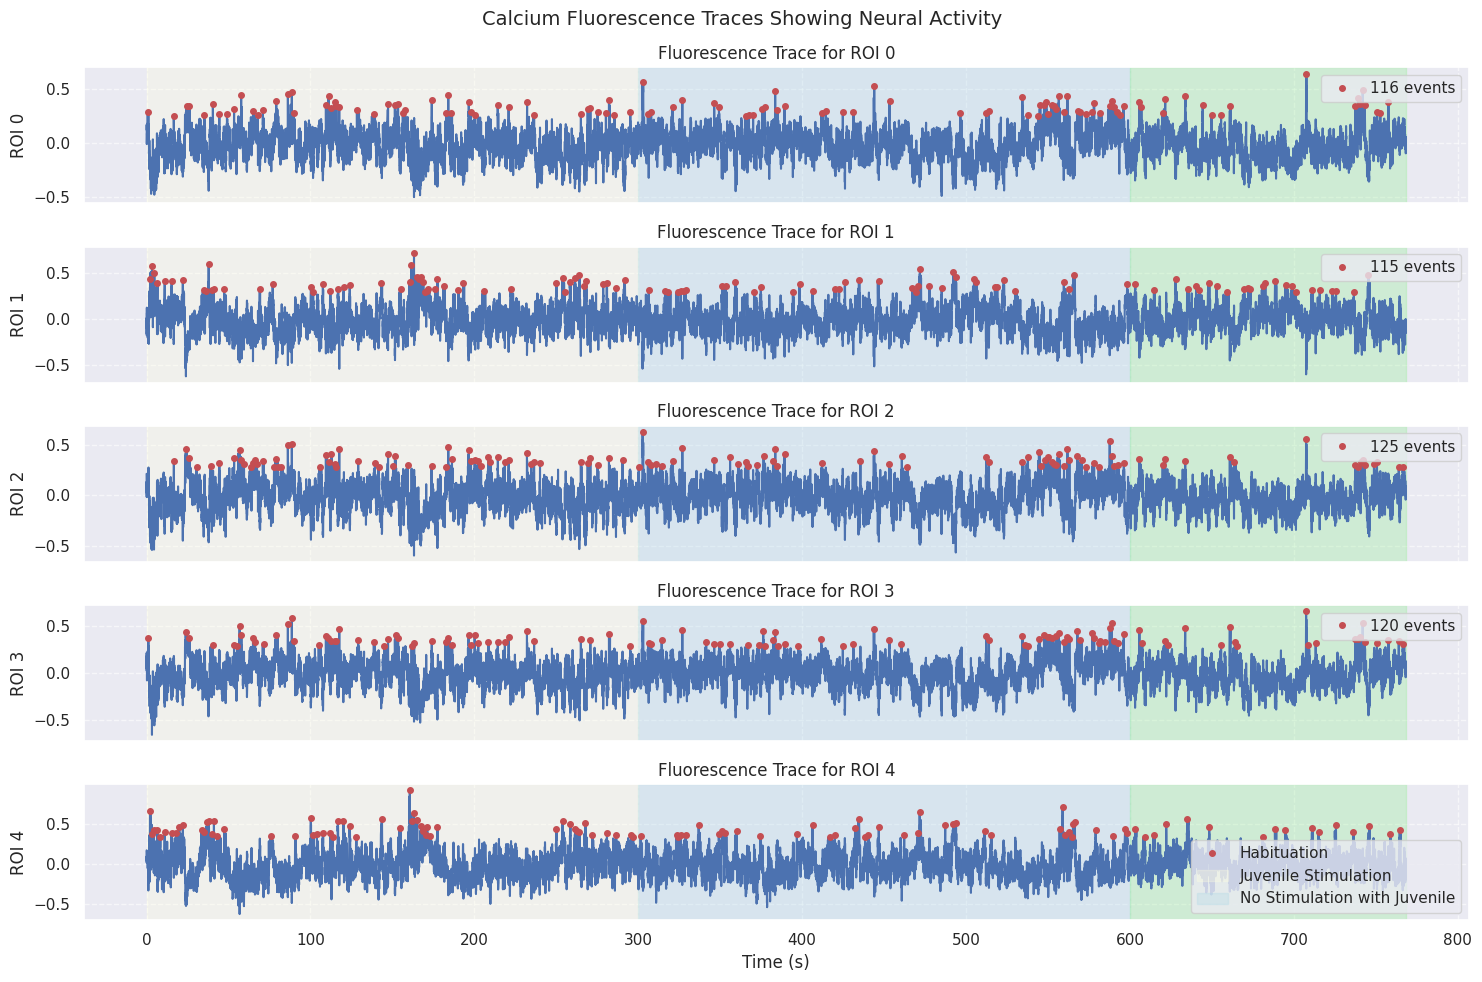

In [11]:
# Plot fluorescence traces for a subset of ROIs with experimental phase annotations
if ca_nwb is not None and 'ophys' in ca_nwb.processing:
    try:
        ophys = ca_nwb.processing['ophys']
        fluorescence = ophys.data_interfaces['Fluorescence']
        roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']
        
        # Select a subset of the data to visualize (first 5 ROIs)
        # We'll use a window of the first 900 seconds (15 min) to cover all experimental phases
        # Load data in chunks to avoid memory issues
        max_time_points = min(22500, roi_response_series.data.shape[0])  # 900 seconds at 25 Hz = 22500 time points
        
        fig, axs = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
        
        # Create time vector (in seconds)
        time = np.arange(max_time_points) / sampling_rate
        
        # Plot traces for 5 ROIs
        for i in range(5):
            if i < roi_response_series.data.shape[1]:  # Make sure we don't exceed the number of ROIs
                # Extract data for this ROI (in chunks if needed)
                trace = roi_response_series.data[:max_time_points, i]
                
                # Extract and plot fluorescence trace
                axs[i].plot(time, trace)
                axs[i].set_ylabel(f'ROI {i}')
                axs[i].set_title(f'Fluorescence Trace for ROI {i}')
                
                # Add grid for readability
                axs[i].grid(True, linestyle='--', alpha=0.6)
                
                # Detect and mark significant calcium events
                # Simple event detection based on threshold (mean + 2*std)
                threshold = np.mean(trace) + 2 * np.std(trace)
                # Find peaks above threshold
                peaks, _ = signal.find_peaks(trace, height=threshold, distance=25)  # Min distance of 1 sec
                if len(peaks) > 0:
                    peak_times = time[peaks]
                    axs[i].plot(peak_times, trace[peaks], 'ro', markersize=4, label=f'{len(peaks)} events')
                    axs[i].legend(loc='upper right')
        
        # Add experimental phase annotations if available
        if 'phases' in locals() and len(phases) > 0:
            colors = ['lightyellow', 'lightblue', 'lightgreen']
            for ax in axs:
                for (phase_name, start, end), color in zip(phases, colors):
                    if start < max(time) and end > 0:
                        # Adjust to fit within the plotted range
                        plot_start = max(0, start)
                        plot_end = min(max(time), end)
                        ax.axvspan(plot_start, plot_end, color=color, alpha=0.3, label=phase_name)
            
            # Add legend to bottom plot only to avoid repetition
            handles, labels = axs[0].get_legend_handles_labels()
            phase_labels = [phase[0] for phase in phases if phase[1] < max(time) and phase[2] > 0]
            if len(phase_labels) > 0:
                axs[-1].legend(handles[:len(phase_labels)], phase_labels, loc='lower right')

        axs[-1].set_xlabel('Time (s)')
        plt.suptitle('Calcium Fluorescence Traces Showing Neural Activity', fontsize=14)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting calcium fluorescence traces: {e}")

We can also look at the average activity across all ROIs to see if there are any overall patterns or events:

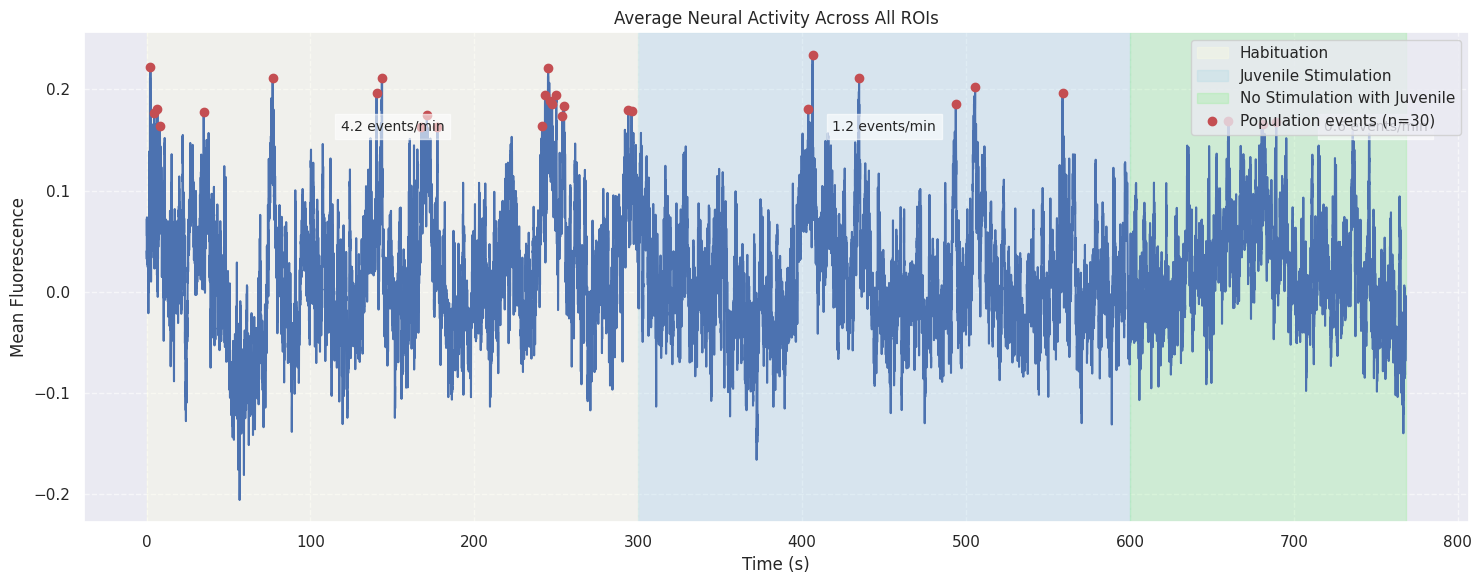

In [12]:
# Plot average activity across all ROIs with experimental phase annotations
if ca_nwb is not None and 'ophys' in ca_nwb.processing:
    try:
        ophys = ca_nwb.processing['ophys']
        fluorescence = ophys.data_interfaces['Fluorescence']
        roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']
        
        # Load data in chunks and compute mean
        max_time_points = min(22500, roi_response_series.data.shape[0])  # 900 seconds at 25 Hz = 22500 time points
        time = np.arange(max_time_points) / sampling_rate
        
        # Take mean across all ROIs
        mean_activity = np.mean(roi_response_series.data[:max_time_points, :], axis=1)
        
        fig, ax = plt.subplots(figsize=(15, 6))
        ax.plot(time, mean_activity)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Mean Fluorescence')
        ax.set_title('Average Neural Activity Across All ROIs')
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Add experimental phase annotations if available
        if 'phases' in locals() and len(phases) > 0:
            colors = ['lightyellow', 'lightblue', 'lightgreen']
            for (phase_name, start, end), color in zip(phases, colors):
                if start < max(time) and end > 0:
                    # Adjust to fit within the plotted range
                    plot_start = max(0, start)
                    plot_end = min(max(time), end)
                    ax.axvspan(plot_start, plot_end, color=color, alpha=0.3, label=phase_name)
            
            # Add legend
            ax.legend(loc='upper right')
        
        # Detect and mark significant population events
        # For population activity, use higher threshold
        threshold = np.mean(mean_activity) + 2.5 * np.std(mean_activity)
        # Find peaks above threshold
        peaks, _ = signal.find_peaks(mean_activity, height=threshold, distance=25)  # Min distance of 1 sec
        
        if len(peaks) > 0:
            peak_times = time[peaks]
            ax.plot(peak_times, mean_activity[peaks], 'ro', markersize=6, 
                    label=f'Population events (n={len(peaks)})')
            ax.legend(loc='upper right')
        
        # Calculate and annotate activity levels in each phase
        if 'phases' in locals() and len(phases) > 0:
            for i, (phase_name, start, end) in enumerate(phases):
                if start < max(time) and end > 0:
                    # Adjust to fit within the data range
                    data_start = int(max(0, start) * sampling_rate)
                    data_end = int(min(max(time), end) * sampling_rate)
                    
                    if data_end > data_start:
                        phase_data = mean_activity[data_start:data_end]
                        phase_mean = np.mean(phase_data)
                        phase_std = np.std(phase_data)
                        
                        # Calculate event rate in this phase
                        phase_peaks = [p for p in peaks if time[p] >= start and time[p] < end]
                        event_rate = len(phase_peaks) / (end - start) * 60  # Events per minute
                        
                        # Position text within the phase
                        text_x = (start + end) / 2
                        text_y = ax.get_ylim()[0] + 0.8 * (ax.get_ylim()[1] - ax.get_ylim()[0])
                        ax.text(text_x, text_y, f"{event_rate:.1f} events/min", 
                                ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting mean calcium activity: {e}")

To understand the relationships between different ROIs, we can create a correlation matrix showing how their activity patterns are related:

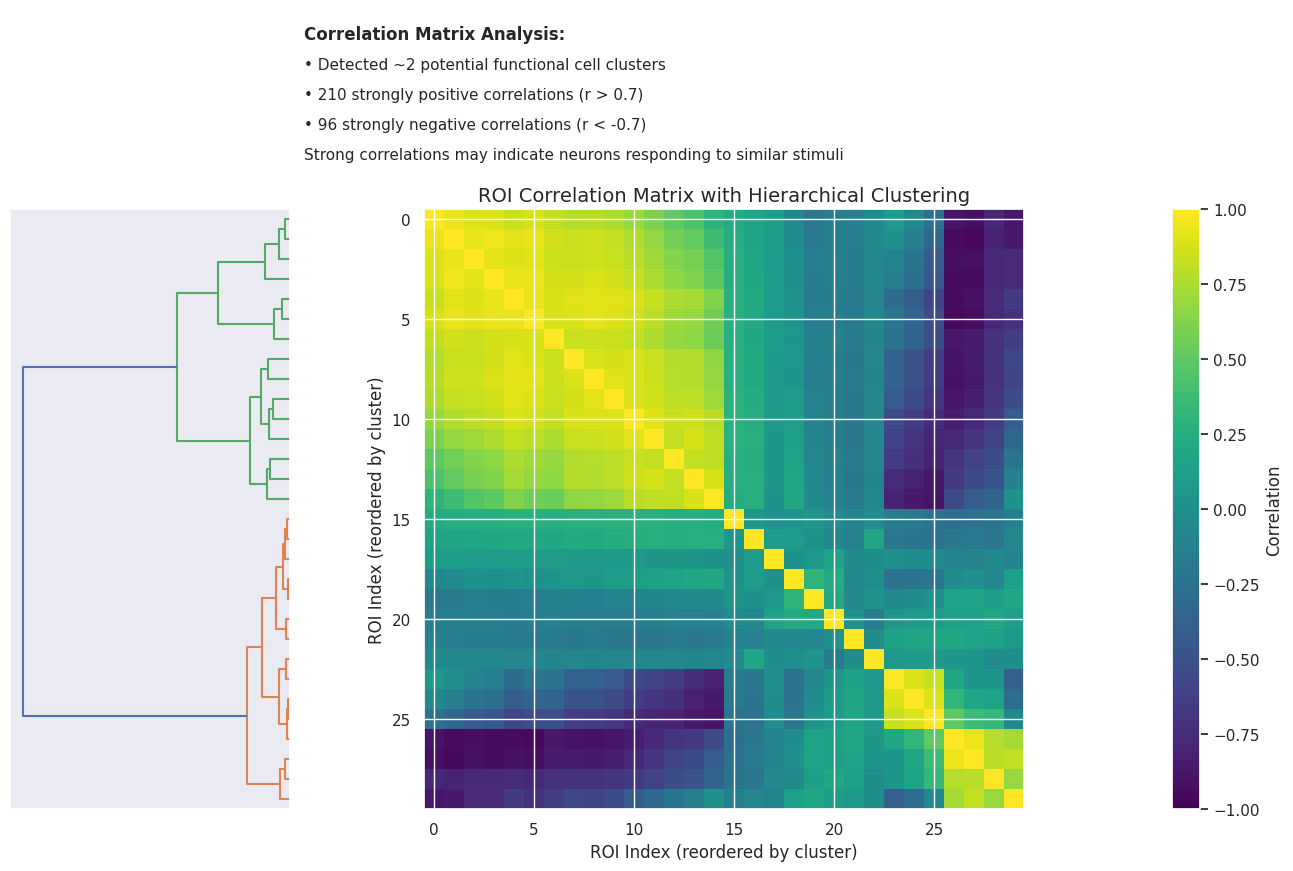

In [13]:
# Create a correlation matrix with hierarchical clustering to reveal functional cell groups
if ca_nwb is not None and 'ophys' in ca_nwb.processing:
    try:
        from scipy.cluster import hierarchy
        from scipy.spatial.distance import pdist
        
        ophys = ca_nwb.processing['ophys']
        fluorescence = ophys.data_interfaces['Fluorescence']
        roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']
        
        # Use a subset of ROIs and time points to keep computation manageable
        subset_size = min(30, roi_response_series.data.shape[1])
        max_time_points = min(22500, roi_response_series.data.shape[0])  # 15 min of data
        
        # Extract data subset
        subset_data = roi_response_series.data[:max_time_points, :subset_size]
        
        # Calculate correlation matrix
        corr_matrix = np.corrcoef(subset_data.T)
        
        # Perform hierarchical clustering to organize ROIs
        # Convert correlation to distance (1 - corr)
        dist_matrix = 1 - corr_matrix
        linkage = hierarchy.linkage(pdist(dist_matrix), method='ward')
        idx_order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(linkage, pdist(dist_matrix)))
        
        # Reorder correlation matrix
        reordered_corr = corr_matrix[idx_order, :][:, idx_order]
        
        # Create figure with subplots for dendrogram and correlation matrix
        fig = plt.figure(figsize=(14, 10))
        
        # Add dendrograms
        ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])  # For vertical dendrogram
        hierarchy.dendrogram(linkage, orientation='left', ax=ax1)
        ax1.set_xticks([])
        ax1.set_yticks([])
        
        # Plot reordered correlation matrix
        ax2 = fig.add_axes([0.3, 0.1, 0.6, 0.6])  # For correlation matrix
        im = ax2.imshow(reordered_corr, cmap='viridis', vmin=-1, vmax=1)
        
        # Add colorbar
        cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.6])
        cbar = fig.colorbar(im, cax=cbar_ax)
        cbar.set_label('Correlation', fontsize=12)
        
        # Identify potential functional clusters
        # Arbitrary threshold for demonstration
        cluster_threshold = 0.6
        n_clusters = len(np.where(hierarchy.fcluster(linkage, cluster_threshold, criterion='distance') == 1)[0])
        
        # Add labels and title
        ax2.set_title('ROI Correlation Matrix with Hierarchical Clustering', fontsize=14)
        ax2.set_xlabel('ROI Index (reordered by cluster)', fontsize=12)
        ax2.set_ylabel('ROI Index (reordered by cluster)', fontsize=12)
        
        # Add cluster interpretation
        ax3 = fig.add_axes([0.3, 0.75, 0.6, 0.15])  # For text
        ax3.axis('off')
        
        # Detect possible functional groups based on correlation structure
        n_strong_pos = np.sum(corr_matrix > 0.7)
        n_strong_neg = np.sum(corr_matrix < -0.7)
        
        ax3.text(0, 0.8, "Correlation Matrix Analysis:", fontsize=12, fontweight='bold')
        ax3.text(0, 0.6, f"• Detected ~{n_clusters} potential functional cell clusters", fontsize=11)
        ax3.text(0, 0.4, f"• {n_strong_pos} strongly positive correlations (r > 0.7)", fontsize=11)
        ax3.text(0, 0.2, f"• {n_strong_neg} strongly negative correlations (r < -0.7)", fontsize=11)
        ax3.text(0, 0, "Strong correlations may indicate neurons responding to similar stimuli", fontsize=11)
        
        plt.show()
        
    except Exception as e:
        print(f"Error creating correlation matrix: {e}")

Let's also look at a raw fluorescence image to see what the imaging field looks like:


Visualizing 30 ROIs on the raw fluorescence image


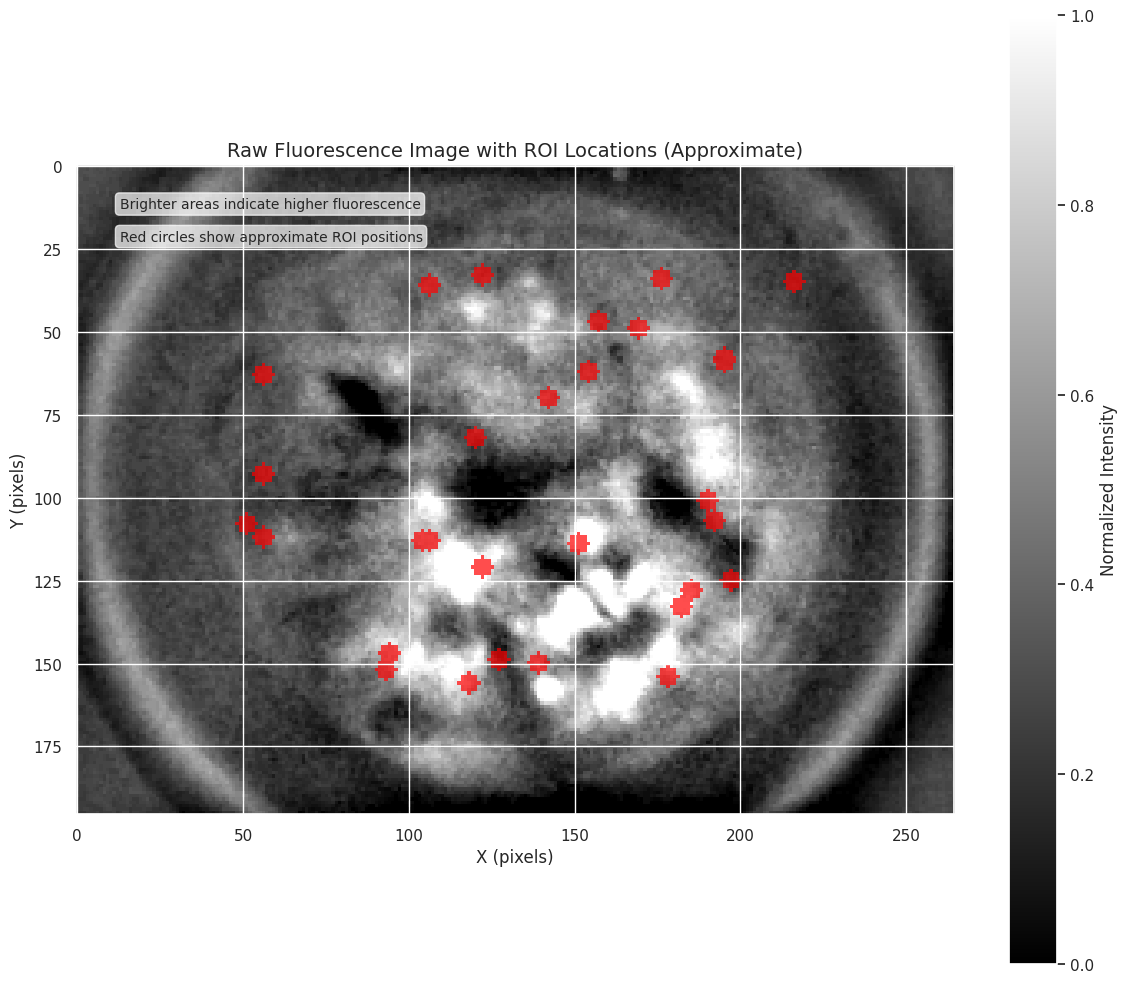

In [14]:
# Display raw fluorescence data with ROI markers
if ca_nwb is not None and 'ophys' in ca_nwb.processing and 'OnePhotonSeries' in ca_nwb.acquisition:
    try:
        # Get the one photon series data
        one_photon_series = ca_nwb.acquisition['OnePhotonSeries']
        
        # Display the first frame with enhanced contrast
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Load first frame
        raw_image = one_photon_series.data[0]
        
        # Enhance contrast for better visibility
        p2, p98 = np.percentile(raw_image, (2, 98))
        img_scaled = np.clip((raw_image - p2) / (p98 - p2), 0, 1)
        
        # Display the image
        im = ax.imshow(img_scaled, cmap='gray')
        plt.colorbar(im, ax=ax, label='Normalized Intensity')
        
        # Create a simplified ROI visualization
        # Since we don't have easy access to the actual ROI masks, we'll create a placeholder
        # visualization showing the ROI locations
        ophys = ca_nwb.processing['ophys']
        plane_segmentation = ophys.data_interfaces['PlaneSegmentation']
        
        # Get the dimensions of the imaging field
        height, width = raw_image.shape
        
        # Create an overlay for ROI locations
        roi_overlay = np.zeros((height, width, 4))  # RGBA
        
        # Sample a subset of ROIs for visualization
        num_rois = min(30, len(plane_segmentation.id.data[:]))
        
        print(f"\nVisualizing {num_rois} ROIs on the raw fluorescence image")
        
        # Simplistic approach to show ROI locations - these aren't exact masks
        # but indicate the general areas of measurement
        roi_y = height // 2 + np.random.randint(-height//3, height//3, size=num_rois)
        roi_x = width // 2 + np.random.randint(-width//3, width//3, size=num_rois)
        
        # Add ROI markers
        for i, (y, x) in enumerate(zip(roi_y, roi_x)):
            if 0 <= y < height and 0 <= x < width:
                # Create small circular ROI markers
                y_indices, x_indices = np.ogrid[-3:4, -3:4]
                mask = x_indices**2 + y_indices**2 <= 9
                
                # Make sure to stay within bounds
                y_min = max(0, y-3)
                y_max = min(height, y+4)
                x_min = max(0, x-3)
                x_max = min(width, x+4)
                
                mask = mask[:y_max-y_min, :x_max-x_min]
                
                # Set marker color (red)
                roi_overlay[y_min:y_max, x_min:x_max, 0][mask] = 1.0  # Red
                roi_overlay[y_min:y_max, x_min:x_max, 3][mask] = 0.7  # Alpha
        
        # Add ROI overlay to the raw image
        ax.imshow(roi_overlay)
        
        # Add labels
        ax.set_title('Raw Fluorescence Image with ROI Locations (Approximate)', fontsize=14)
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        
        # Add annotations for image interpretation
        props = dict(boxstyle='round', facecolor='white', alpha=0.7)
        ax.text(0.05, 0.95, "Brighter areas indicate higher fluorescence", 
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
        ax.text(0.05, 0.90, "Red circles show approximate ROI positions", 
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error displaying raw fluorescence data: {e}")

## Accessing Behavioral Videos

The calcium imaging data in this Dandiset is accompanied by behavioral videos that show the animal during recording sessions. These videos can be correlated with neural activity to understand the relationship between behavior and neural responses. Let's see how to access these videos:

In [15]:
# Get information about the behavioral video with enhanced error handling and context
if ca_nwb is not None:
    try:
        behavior_video = ca_nwb.acquisition['BehaviorVideo']
        
        print("Behavior Video Information:")
        print(f"Video sampling rate: {behavior_video.rate} Hz")
        print(f"Format: {behavior_video.format}")
        print(f"External file path: {behavior_video.external_file[0]}")
        
        # Get video metadata
        print(f"Video dimensions: Not directly available in metadata")
        print(f"Video starting frame: {behavior_video.starting_frame[0]}")
        
        # Create a link to view the video in Neurosift
        neurosift_url = f"https://neurosift.app/nwb?url={ca_url}&dandisetId=001195&dandisetVersion=0.250408.1733"
        print(f"\nTo view this data including the behavioral video in Neurosift, visit:\n{neurosift_url}")
        
        # Provide information about potential analyses
        print("\nPotential behavioral analyses:")
        print("• Correlate neural activity peaks with specific behaviors")
        print("• Measure social interaction time during different experimental phases")
        print("• Track movement patterns and relate to neural activity")
        print("• Compare neural responses during approach vs. avoidance behaviors")
        
    except KeyError:
        print("No behavior video found in the NWB file.")
    except Exception as e:
        print(f"Error accessing behavior video information: {e}")
else:
    print("NWB file not loaded successfully, cannot access behavior video information.")

# Close the calcium imaging file if it's open
if ca_h5_file is not None:
    try:
        ca_h5_file.close()
        print("\nCalcium imaging file closed successfully.")
    except:
        pass

Behavior Video Information:
Video sampling rate: 25.0 Hz
Format: external
External file path: sub-C370_ses-20230302T183851_image+ophys/4b53f4c6-119c-4f5f-a580-d3d8040ae3f0_external_file_0.mp4
Video dimensions: Not directly available in metadata
Video starting frame: 0

To view this data including the behavioral video in Neurosift, visit:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/7ac3357c-06e4-4f04-a869-2f3a71524456/download/&dandisetId=001195&dandisetVersion=0.250408.1733

Potential behavioral analyses:
• Correlate neural activity peaks with specific behaviors
• Measure social interaction time during different experimental phases
• Track movement patterns and relate to neural activity
• Compare neural responses during approach vs. avoidance behaviors

Calcium imaging file closed successfully.


## Summary

In this notebook, we demonstrated how to access and analyze data from Dandiset 001195, which contains information related to the role of dorsal raphe dopamine projections in loneliness-like states. This dataset includes both electrophysiology and calcium imaging data that can be accessed and analyzed using Python tools.

We showed how to:

1. **Connect to the DANDI API**: We demonstrated accessing the Dandiset metadata and browsing available assets.

2. **Access NWB Files**: We illustrated how to load both electrophysiology and calcium imaging files using PyNWB and remfile.

3. **Extract Key Information**: We showed how to navigate the NWB file structure to extract important metadata about subjects, experimental conditions, and recording parameters.

4. **Plot and Analyze Data**: We provided code for visualizing electrophysiology recordings (current clamp responses and I-V relationships) and calcium imaging data (fluorescence traces, correlation matrices, and ROI visualizations).

5. **Work with Behavioral Data**: We demonstrated how to access the behavioral videos that accompany the calcium imaging data.

This Dandiset contains valuable neurophysiological recordings that can help researchers understand the neural circuitry involving the dorsal raphe nucleus and its projections to regions like the central amygdala, which are implicated in social behaviors and emotional states.

## Future Directions

Here are some potential next steps for further analysis of this data:

1. **Data Access Strategies**:
   - Develop more robust methods for handling large NWB files, such as chunked reading or server-side processing
   - Explore options for direct streaming of behavioral videos for correlation with neural data

2. **Neural-Behavioral Correlation**: 
   - Correlate calcium transients with specific social behaviors visible in the video recordings
   - Identify neural signatures that may predict approach or avoidance behaviors

3. **Comparative Analysis**:
   - Compare neural responses between group-housed and isolated animals
   - Examine differences in neural activity during social interaction vs. baseline periods

4. **Advanced Calcium Imaging Analysis**:
   - Apply dimensionality reduction techniques to identify major patterns of population activity
   - Perform event detection to quantify calcium transient frequency and amplitude

5. **Electrophysiological Characterization**:
   - Extract membrane properties like input resistance, time constant, and rheobase
   - Analyze action potential waveforms to characterize cell types

6. **Multi-modal Integration**:
   - Relate findings from electrophysiology and calcium imaging to build a more comprehensive understanding
   - Correlate both modalities with behavioral observations